In [343]:
# Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

In [253]:
df = pd.read_csv('zomato_restaurants_in_India.csv')

In [254]:
df.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [255]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [256]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [257]:
df.shape

(211944, 26)

In [258]:
df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [259]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [260]:
df.drop_duplicates(["res_id"],keep='first',inplace=True)
print("Duplicates Removed.")

Duplicates Removed.


In [261]:
df.shape

(55568, 26)

In [262]:
df.fillna(df.select_dtypes(include=["number"]).mean(), inplace=True)
df.fillna(df.select_dtypes(include=["object"]).mode().iloc[0], inplace=True)
print("Missing valued handel.")

Missing valued handel.


In [263]:
outlets = df["name"].value_counts()
chains = outlets[outlets>=2]
single = outlets[outlets==1]

In [264]:
chains=pd.DataFrame(chains)
chains

,count
name,
Domino's Pizza,399
Cafe Coffee Day,315
KFC,204
Baskin Robbins,202
Keventers,189
...,...
Santoor Restaurant,2
The Ice House,2
Zaatar Arabic Restaurant,2


In [265]:
top_10_chains=chains.head(10)
top_10_chains

,count
name,
Domino's Pizza,399
Cafe Coffee Day,315
KFC,204
Baskin Robbins,202
Keventers,189
Subway,178
McDonald's,130
Pizza Hut,125
Barbeque Nation,112


In [266]:
print("Total Restaurants = ", df.shape[0])
print("Total Restaurants that are part of some chain = ", df.shape[0] - single.shape[0])
print("Percentage of Restaurants that are part of a chain = ", np.round((df.shape[0] - single.shape[0]) / df.shape[0],2)*100, "%")

Total Restaurants =  55568
Total Restaurants that are part of some chain =  19358
Percentage of Restaurants that are part of a chain =  35.0 %


In [267]:
matplotlib.rc('font',family='Nirmala UI')

In [268]:
df["name"]=df["name"].apply(lambda x:x.encode('ascii','ignore').decode('utf-8'))

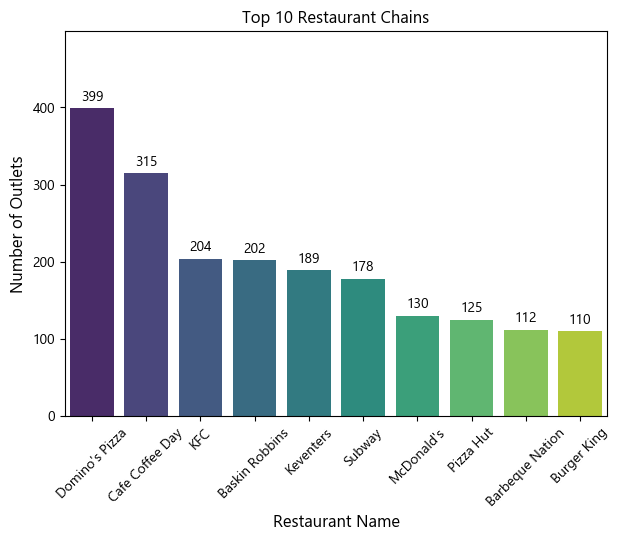

In [298]:
plt.figure(figsize=(7,5))
sns.barplot(x="name",y="count",hue="name",data=top_10,palette="viridis")
for index, value in enumerate(top_10["count"]):plt.text(index,value+10,str(value),ha='center')
plt.ylim(0,max(top_10_chains["count"])+100)
plt.title("Top 10 Restaurant Chains")
plt.xlabel("Restaurant Name",fontsize=12)
plt.ylabel("Number of Outlets",fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [270]:
outlets = data["name"].value_counts()
atleast_5_outlets = outlets[outlets > 4]
print(atleast_5_outlets)

name
Domino's Pizza                     3108
KFC                                1343
Cafe Coffee Day                    1068
Pizza Hut                           936
Subway                              766
                                   ... 
Shankar Shop                          5
Shree Anandhaas Sweets & Snacks       5
Gucchi - Hotel Holiday Home           5
Hari Om Restaurant                    5
Cold Valley                           5
Name: count, Length: 10517, dtype: int64


In [271]:
df["aggregate_rating"]=pd.to_numeric(df["aggregate_rating"],errors="coerce")

In [272]:
top_chains_rating = df[df["name"].isin(atleast_5_outlets.index)].groupby("name")["aggregate_rating"].mean().reset_index()
top_chains_rating = top_chains_rating.sort_values(by="aggregate_rating",ascending=False).head(10)
print(top_chains_rating)

                                     name  aggregate_rating
6997                   Plum By Bent Chair               4.9
6675                     Palladium Social               4.9
10251                      Yanki Sizzlers               4.9
9501                         The Sidewalk               4.9
10161  White Charcoal - The Empresa Hotel               4.9
2134                                Chool               4.9
1068                              Bhangra               4.9
7036                 Pousada By The Beach               4.9
2763                 Dragonfly Experience               4.9
4875           Kebabsville - Sayaji Hotel               4.9


C:\Users\Maitrey\AppData\Local\Temp\ipykernel_33380\2025055193.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("viridis", num_bars)


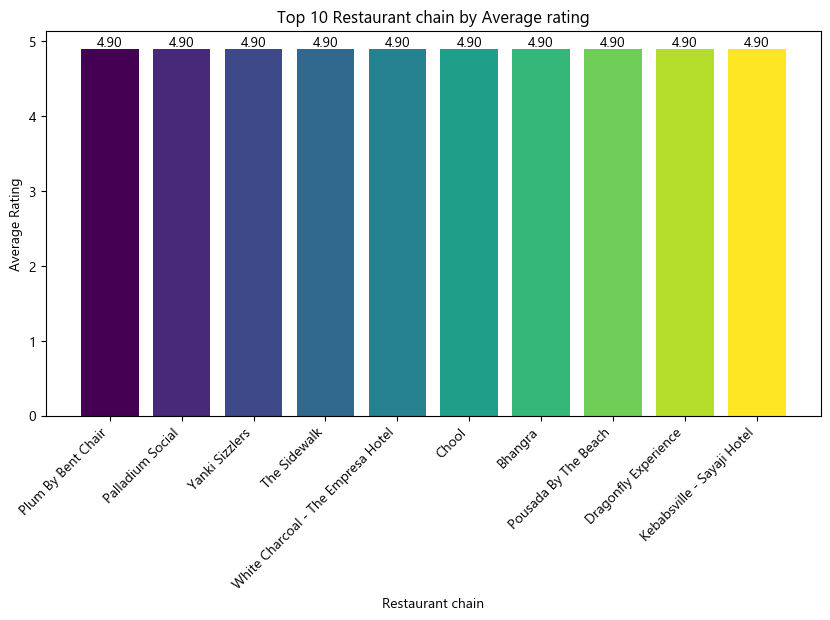

In [300]:
plt.figure(figsize=(10,5))
num_bars = len(top_chains_rating)
colors = plt.cm.get_cmap("viridis", num_bars) 
bars=plt.bar(top_chains_rating["name"],top_chains_rating["aggregate_rating"],color=colors(np.arange(num_bars)))
plt.xlabel("Restaurant chain")
plt.ylabel("Average Rating")
plt.title("Top 10 Restaurant chain by Average rating")
plt.xticks(rotation=45,ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')  

plt.show()

In [274]:
print(top_chains_rating.dtypes)
print(top_chains_rating.head())

name                 object
aggregate_rating    float64
dtype: object
                                     name  aggregate_rating
6997                   Plum By Bent Chair               4.9
6675                     Palladium Social               4.9
10251                      Yanki Sizzlers               4.9
9501                         The Sidewalk               4.9
10161  White Charcoal - The Empresa Hotel               4.9


In [284]:
num_restaurants=df["name"].nunique()
print(f"Total number of unique restaurant: {num_restaurants}")

Total number of unique restaurant: 41097


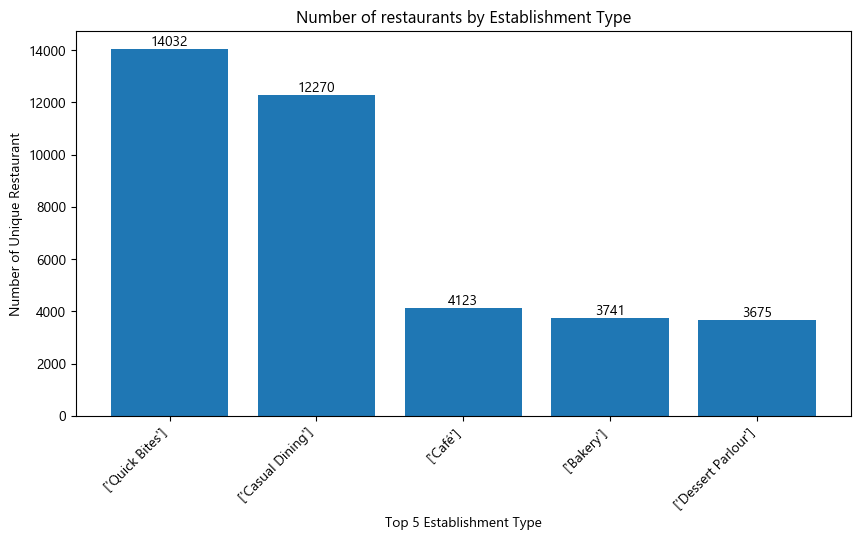

In [322]:
top_establishments = df["establishment"].value_counts().head(5)
top_establishmnet_data = df[df["establishment"].isin(top_establishments.index)]
establishment_counts = top_establishmnet_data.groupby("establishment")["res_id"].nunique().sort_values(ascending=False)
plt.figure(figsize=(10,5))
bars=plt.bar(establishment_counts.index,establishment_counts.values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval+10, str(int(yval)), ha='center', va='bottom')  
plt.xlabel("Top 5 Establishment Type")
plt.ylabel("Number of Unique Restaurant")
plt.title("Number of restaurants by Establishment Type")
plt.xticks(rotation=45,ha='right')
plt.show()

In [302]:
avg_rating_votes_photo=df[["aggregate_rating","votes","photo_count"]].mean()
print(avg_rating_votes_photo)

aggregate_rating      2.958593
votes               223.330352
photo_count         160.974770
dtype: float64


In [307]:
top_10_votes = df.groupby("establishment")["votes"].mean().reset_index()
top_10_votes = top_10_votes.sort_values(by="votes",ascending=False).head(10)
top_10_votes

,establishment,votes
19,['Microbrewery'],1992.300000
22,['Pub'],880.274510
1,['Bar'],500.613295
17,['Lounge'],494.509756
6,['Casual Dining'],396.339935
8,['Cocktail Bar'],309.625000
7,['Club'],300.544643
12,['Fine Dining'],293.126384
5,['Café'],276.558574
15,['Irani Cafe'],178.714286


In [308]:
top_10_photos = df.groupby("establishment")["photo_count"].mean().reset_index()
top_10_photos = top_10_photos.sort_values(by="photo_count",ascending=False).head(10)
top_10_photos

,establishment,photo_count
19,['Microbrewery'],2042.054545
22,['Pub'],652.955182
8,['Cocktail Bar'],555.625000
17,['Lounge'],514.687805
1,['Bar'],513.321658
12,['Fine Dining'],364.817590
5,['Café'],331.935969
6,['Casual Dining'],291.550448
15,['Irani Cafe'],173.000000
7,['Club'],107.089286


In [309]:
top_10_rating = df.groupby("establishment")["aggregate_rating"].mean().reset_index()
top_10_rating = top_10_rating.sort_values(by="aggregate_rating",ascending=False).head(10)
top_10_rating

,establishment,aggregate_rating
19,['Microbrewery'],4.268182
22,['Pub'],3.758263
8,['Cocktail Bar'],3.531250
12,['Fine Dining'],3.436547
17,['Lounge'],3.436463
7,['Club'],3.378571
15,['Irani Cafe'],3.321429
6,['Casual Dining'],3.238680
5,['Café'],3.212345
4,['Butcher Shop'],3.110390


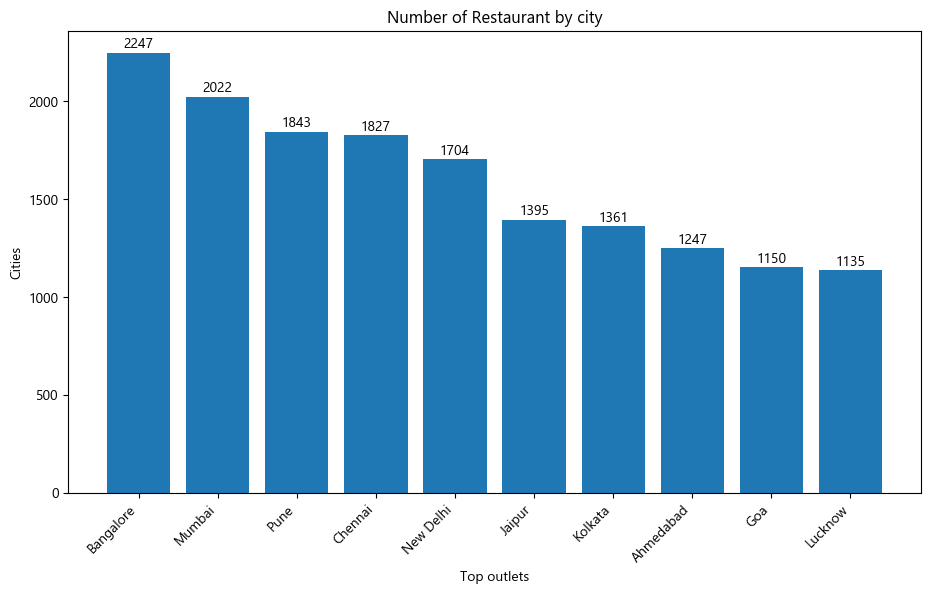

In [311]:
top_city = df["city"].value_counts().head(10)
top_city_data = df[df["city"].isin(top_city.index)]
city_counts = top_city_data.groupby("city")["res_id"].nunique().sort_values(ascending=False)
plt.figure(figsize=(11,6))
bars=plt.bar(city_counts.index,city_counts.values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval+10, str(int(yval)), ha='center', va='bottom')  
plt.xlabel("Top outlets")
plt.ylabel("Cities")
plt.title("Number of Restaurant by city")
plt.xticks(rotation=45,ha='right')
plt.show()

In [324]:
rating_by_city = df.groupby("city")["aggregate_rating"].mean().reset_index()
top_10_rating_by_city = rating_by_city.sort_values(by="aggregate_rating",ascending=False).head(10)
top_10_rating_by_city

,city,aggregate_rating
26,Gurgaon,3.828525
81,Secunderabad,3.822222
31,Hyderabad,3.755839
46,Kolkata,3.751947
66,New Delhi,3.727347
56,Mumbai,3.709298
8,Bangalore,3.698175
67,Noida,3.620307
12,Chennai,3.597701
74,Pune,3.509224


In [325]:
votes_by_city = df.groupby("city")["votes"].mean().reset_index()
top_10_votes_by_city = votes_by_city.sort_values(by="votes",ascending=False).head(10)
top_10_votes_by_city

,city,votes
31,Hyderabad,955.549878
81,Secunderabad,955.433333
56,Mumbai,797.158259
8,Bangalore,724.940365
66,New Delhi,711.116197
46,Kolkata,615.706833
26,Gurgaon,613.180328
67,Noida,515.570881
74,Pune,475.715681
63,Navi Mumbai,443.342995


In [327]:
photos_by_city = df.groupby("city")["photo_count"].mean().reset_index()
top_10_photos_by_city = photos_by_city.sort_values(by="photo_count",ascending=False).head(10)
top_10_photos_by_city

,city,photo_count
56,Mumbai,882.273492
66,New Delhi,764.258216
26,Gurgaon,678.491803
46,Kolkata,667.558413
63,Navi Mumbai,547.323671
86,Thane,514.963855
67,Noida,492.291188
8,Bangalore,462.287939
31,Hyderabad,377.274939
74,Pune,333.320130


In [333]:
unique_cuisines = df["cuisines"].nunique()
print(f"Total Unique Cuisines:{unique_cuisines}")

Total Unique Cuisines:9382


In [332]:
cuisines = []
df["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  133


C:\Users\Maitrey\AppData\Local\Temp\ipykernel_33380\2507347822.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("viridis", num_bars)


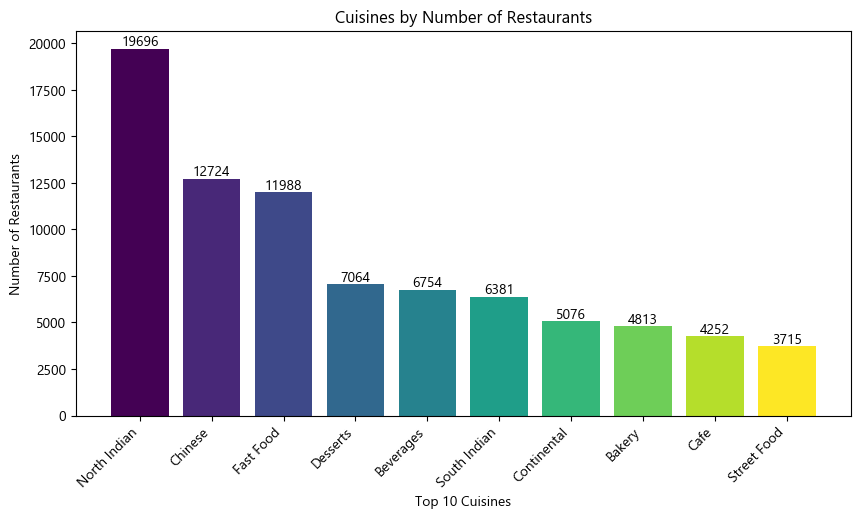

In [350]:
restaurant_per_cuisine = cuisines.value_counts().head(10)
colors = plt.cm.get_cmap("viridis", num_bars)
plt.figure(figsize=(10,5))
bars=plt.bar(restaurant_per_cuisine.index,restaurant_per_cuisine.values,color=colors(np.arange(num_bars)))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval+10, str(int(yval)), ha='center', va='bottom')  
plt.xlabel("Top 10 Cuisines")
plt.ylabel("Number of Restaurants")
plt.title("Cuisines by Number of Restaurants")
plt.xticks(rotation=45,ha='right')
plt.show()

In [377]:
candr = df.groupby("cuisines")["aggregate_rating"].agg(Sum="sum", Total="count", Mean="mean").reset_index()
candr = c_and_r.sort_values(by=["Mean", "Total"], ascending=False)[:10]
candr

,Sum,Total,Mean
Egyptian,26.5,6.0,4.416667
Poké,52.2,12.0,4.350000
Fusion,8.7,2.0,4.350000
International,4.3,1.0,4.300000
Tex-Mex,141.7,33.0,4.293939
Singaporean,68.6,16.0,4.287500
Moroccan,51.1,12.0,4.258333
Sushi,483.7,115.0,4.206087
Greek,91.5,22.0,4.159091
Mediterranean,1350.6,327.0,4.130275


In [378]:
c_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
Egyptian,4.416667,6.0
Poké,4.350000,12.0
Fusion,4.350000,2.0
International,4.300000,1.0
Tex-Mex,4.293939,33.0
Singaporean,4.287500,16.0
Moroccan,4.258333,12.0
Sushi,4.206087,115.0
Greek,4.159091,22.0
Mediterranean,4.130275,327.0


In [394]:
df["cuisines"] = df["cuisines"].fillna("No cuisine")
cuisines = []
data["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


In [381]:
df["cuisines2"] = df['cuisines'].apply(lambda x : x.split(", "))

cuisines_list = cuisines.unique().tolist()
zeros = np.zeros(shape=(len(cuisines_list),2))
c_and_r = pd.DataFrame(zeros, index=cuisines_list, columns=["Sum","Total"])
for i, x in df.iterrows():
    for j in x["cuisines2"]:
        c_and_r.loc[j]["Sum"] += x["aggregate_rating"]  
        c_and_r.loc[j]["Total"] += 1
c_and_r["Mean"] = c_and_r["Sum"] / c_and_r["Total"]
c_and_r

C:\Users\Maitrey\AppData\Local\Temp\ipykernel_33380\866735233.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  c_and_r.loc[j]["Sum"] += x["aggregate_rating"]
C:\Users\Maitrey\AppData\Local\Temp\ipykernel_33380\866735233.py:9: FutureWarnin

,Sum,Total,Mean
North Indian,60295.0,19696.0,3.061281
South Indian,18635.3,6381.0,2.920436
Mithai,8545.7,3144.0,2.718098
Street Food,10794.6,3715.0,2.905680
Desserts,22723.9,7064.0,3.216860
...,...,...,...
Swedish,3.6,1.0,3.600000
Cake,6.4,2.0,3.200000
Garhwali,3.3,2.0,1.650000
Vegan,3.5,1.0,3.500000


In [382]:
c_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
Egyptian,4.416667,6.0
Poké,4.350000,12.0
Fusion,4.350000,2.0
International,4.300000,1.0
Tex-Mex,4.293939,33.0
Singaporean,4.287500,16.0
Moroccan,4.258333,12.0
Sushi,4.206087,115.0
Greek,4.159091,22.0
Mediterranean,4.130275,327.0


In [388]:
highlight_avg_rating = df.groupby("highlights")["aggregate_rating"].mean().reset_index()
highlight_avg_rating = highlight_avg_rating.sort_values(by="aggregate_rating", ascending=False).head(10)
print(highlight_avg_rating)

                                              highlights  aggregate_rating
22375  ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...               4.9
20682  ['Lunch', 'Credit Card', 'Dinner', 'Cash', 'De...               4.9
23599  ['Lunch', 'Takeaway Available', 'Dinner', 'Cas...               4.9
21048  ['Lunch', 'Delivery', 'Breakfast', 'Dinner', '...               4.9
20690  ['Lunch', 'Credit Card', 'Dinner', 'Cash', 'De...               4.9
24964  ['No Alcohol Available', 'Dinner', 'Cash', 'Lu...               4.9
9281   ['Credit Card', 'No Seating Available', 'Cash'...               4.9
23490  ['Lunch', 'Takeaway Available', 'Debit Card', ...               4.9
20131  ['Lunch', 'Cash', 'Takeaway Available', 'Debit...               4.9
16217  ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...               4.9


In [403]:
df["highlights"] = df["highlights"].fillna("No hightlights")
highlights_list = []
df["highlights"].apply(lambda x : highlights_list.extend(x.split(", ")))
highlights_series = pd.Series(highlights_list)
print("Total number of unique highlights = ", highlights_series.nunique())

Total number of unique highlights =  244


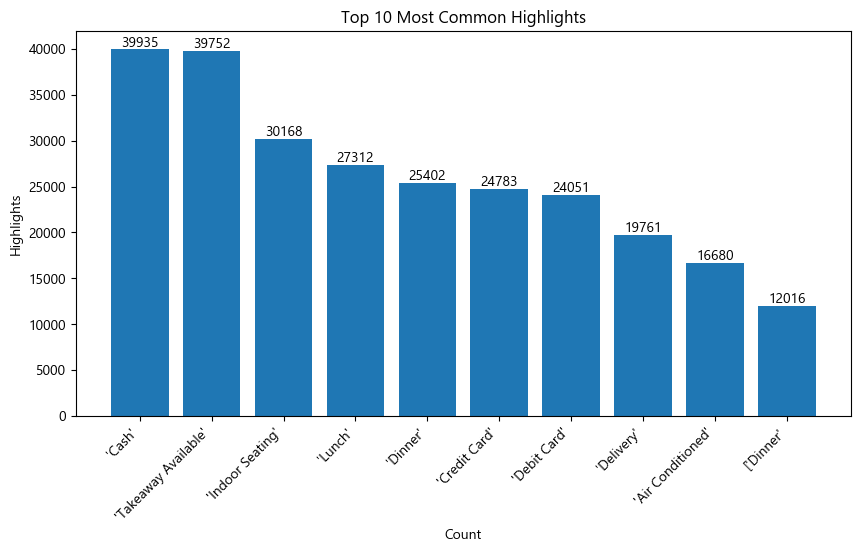

In [405]:
top_highlights = highlights_series.value_counts().head(10)
plt.figure(figsize=(10,5))
bars=plt.bar(top_highlights.index,top_highlights.values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval+10, str(int(yval)), ha='center', va='bottom')  
plt.xlabel("Count")
plt.ylabel("Highlights")
plt.title("Top 10 Most Common Highlights")
plt.xticks(rotation=45,ha='right')
plt.show()

In [439]:
hl = []
df["highlights"].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("Total number of unique highlights = ", hl.nunique())

Total number of unique highlights =  104


In [444]:
df["highlights"][0]

"['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"

In [442]:
df["highlights2"] = df['highlights'].apply(lambda x : x[2:-2].split("', '"))

hl_list = hl.unique().tolist()
zeros = np.zeros(shape=(len(hl_list),2))
h_and_r = pd.DataFrame(zeros, index=hl_list, columns=["Sum","Total"])
for i, x in data.iterrows():
    for j in x["highlights2"]:
        h_and_r.loc[j]["Sum"] += x["aggregate_rating"]  
        h_and_r.loc[j]["Total"] += 1
h_and_r["Mean"] = h_and_r["Sum"] / h_and_r["Total"]
h_and_r

C:\Users\Maitrey\AppData\Local\Temp\ipykernel_33380\482040612.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  h_and_r.loc[j]["Sum"] += x["aggregate_rating"]
C:\Users\Maitrey\AppData\Local\Temp\ipykernel_33380\482040612.py:9: FutureWarnin

,Sum,Total,Mean
Lunch,578882.0,164776.0,3.513145
Takeaway Available,618552.9,180942.0,3.418515
Credit Card,452835.6,121873.0,3.715635
Dinner,595315.7,169291.0,3.516523
Cash,693270.1,203036.0,3.414518
...,...,...,...
Celebrity Frequented,430.4,104.0,4.138462
Alipay Accepted,30.0,10.0,3.000000
Subscription Available,12.3,3.0,4.100000
Subscription Required,13.5,3.0,4.500000


In [ ]:
hl_str = ""
for i in hl:
    hl_str += str(i) + " "
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10, max_words=30).generate(hl_str) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

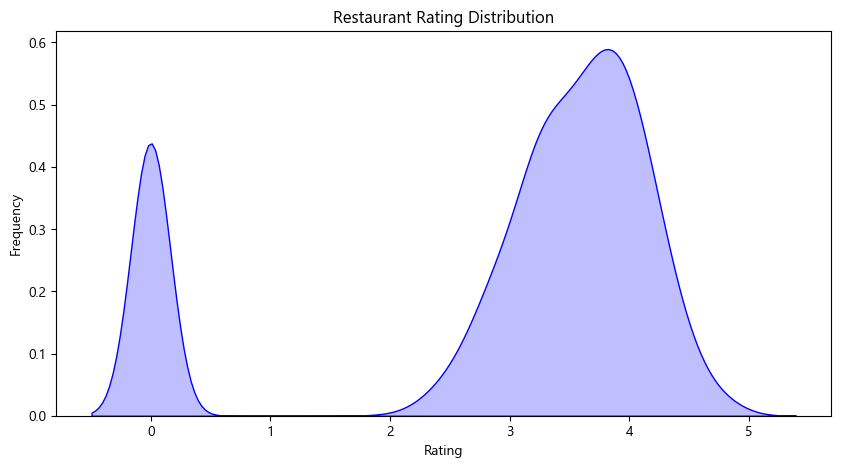

In [451]:
plt.figure(figsize=(10,5))
sns.kdeplot(df["aggregate_rating"].dropna(),fill=True,color="blue")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Restaurant Rating Distribution")
plt.show()

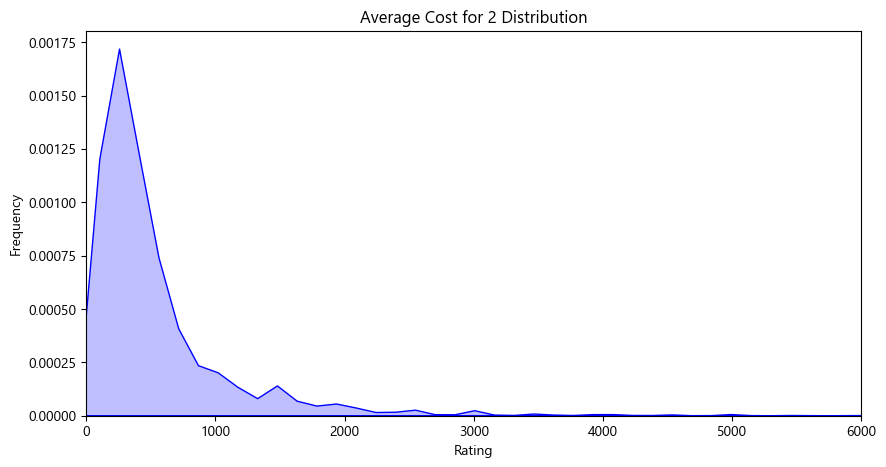

In [453]:
plt.figure(figsize=(10,5))
sns.kdeplot(df["average_cost_for_two"].dropna(),fill=True,color="blue")
plt.xlim(0,6000)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Average Cost for 2 Distribution")
plt.show()

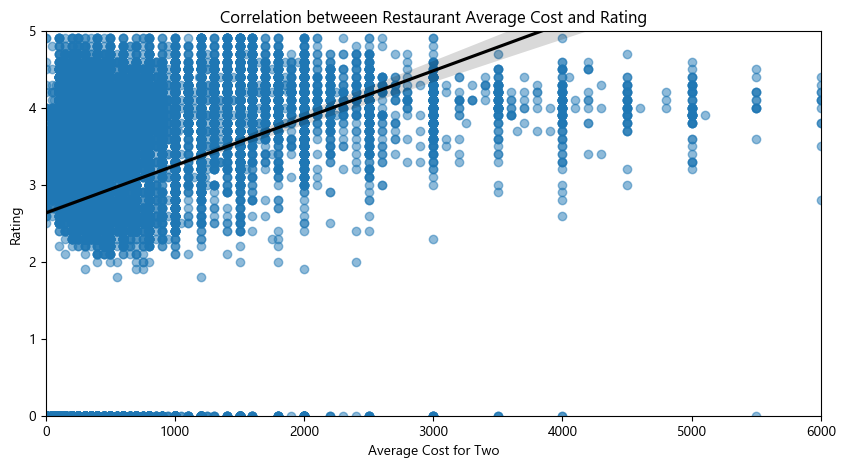

In [458]:
df["average_cost_for_two"]=pd.to_numeric(df["average_cost_for_two"],errors="coerce")
df_cleaned=df.dropna(subset=["aggregate_rating","average_cost_for_two"])
correlation=df_cleaned["aggregate_rating"].corr(df_cleaned["average_cost_for_two"])
plt.figure(figsize=(10,5))
sns.regplot(x=df_cleaned["average_cost_for_two"],y=df_cleaned["aggregate_rating"],scatter_kws={"alpha":0.5},line_kws={"color":"black"})
plt.xlim(0,6000)
plt.ylim(0.0,5)
plt.xlabel("Average Cost for Two")
plt.ylabel("Rating")
plt.title("Correlation betweeen Restaurant Average Cost and Rating")
plt.show()

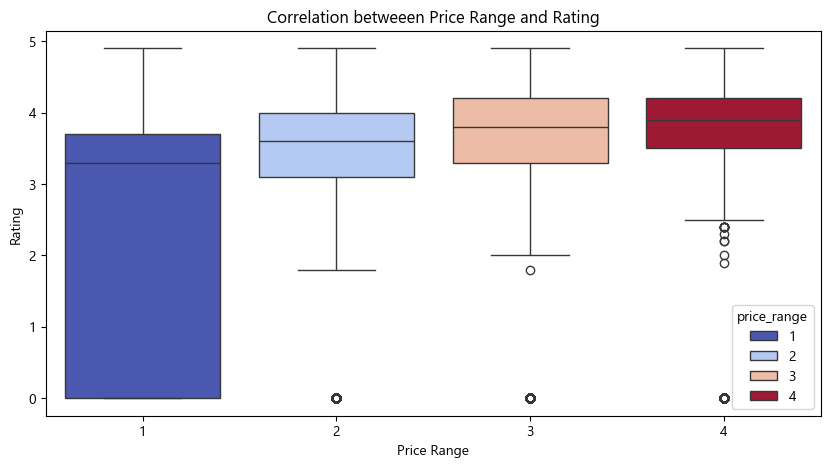

In [461]:
df["price_range"]=pd.to_numeric(df["price_range"],errors="coerce")
df_cleaned=df.dropna(subset=["aggregate_rating","price_range"])
plt.figure(figsize=(10,5))
sns.boxplot(x=df_cleaned["price_range"],y=df_cleaned["aggregate_rating"],data=df_cleaned,hue="price_range",palette="coolwarm")
plt.xlabel("Price Range")
plt.ylabel("Rating")
plt.title("Correlation betweeen Price Range and Rating")
plt.show()

In [ ]:
data.to_csv("zomato_final.csv")